# Übung 1 - Erdrotation

## Xeno Meienberg



In [425]:
# install packages

%matplotlib inline
import numpy as np
from numpy import sin, cos
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [426]:
# functions for rotation matrices

def R1(a):
    a = a*pi/(3600*180) #convert sec of arc into radians
    c, s = cos(a), sin(a)
    R = np.array(((1, 0, 0), (0, c, -s), (0, s, c)))
    return R

def R2(a):
    a = a*pi/(3600*180) #convert sec of arc into radians
    c, s = cos(a), sin(a)
    R = np.array(((c, 0, s), (0, 1, 0), (-s, 0, c)))
    return R  

def R3(a):
    a = a*pi/(3600*180) #convert sec of arc into radians
    c, s = cos(a), sin(a)
    R = np.array(((c, -s, 0), (s, c, 0), (0, 0, 1)))
    return R      

In [427]:
 # define constants and parameters

 lambda_wettzell = 12 #degree
 phi_wettzell = 49.15 #degree
 h = 670 #m
 
 t_GNSS = list(range(0,86700,300)) #s
 t_Lageos = list(range(0,86520,120)) #s

 omega_E = 7.292115*10**(-5) #s^-1
 R_E = 6378137 #m
 x_p = -0.1 #arc second
 y_p = 0.4 #arc second

 pi = np.pi

 #date 19-Sep-2019

 t_obs = 19263
 J2000 = 1

 t = (t_obs - J2000)/36525
 

In [428]:
# load data (1st part of ex. 1)

sat1 = np.loadtxt('Data/PC07asc.sec') #km
sat2 = np.loadtxt('Data/PE07asc.sec') #km
sat3 = np.loadtxt('Data/PG07asc.sec') #km
sat4 = np.loadtxt('Data/PJ03asc.sec') #km
sat5 = np.loadtxt('Data/PL52asc.sec') #km
sat6 = np.loadtxt('Data/PR07asc.sec') #km

In [429]:
# iterate over several lists of sats

sat_positions = [sat1,sat2,sat3,sat4,sat5,sat6]
names = ['Beidou', 'GALILEO 07', 'GPS 07', 'QZSS 03', 'Lageos 1', 'GLONASS 07']

for sat, name in zip(sat_positions, names):
    print(name) 


Beidou
GALILEO 07
GPS 07
QZSS 03
Lageos 1
GLONASS 07


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

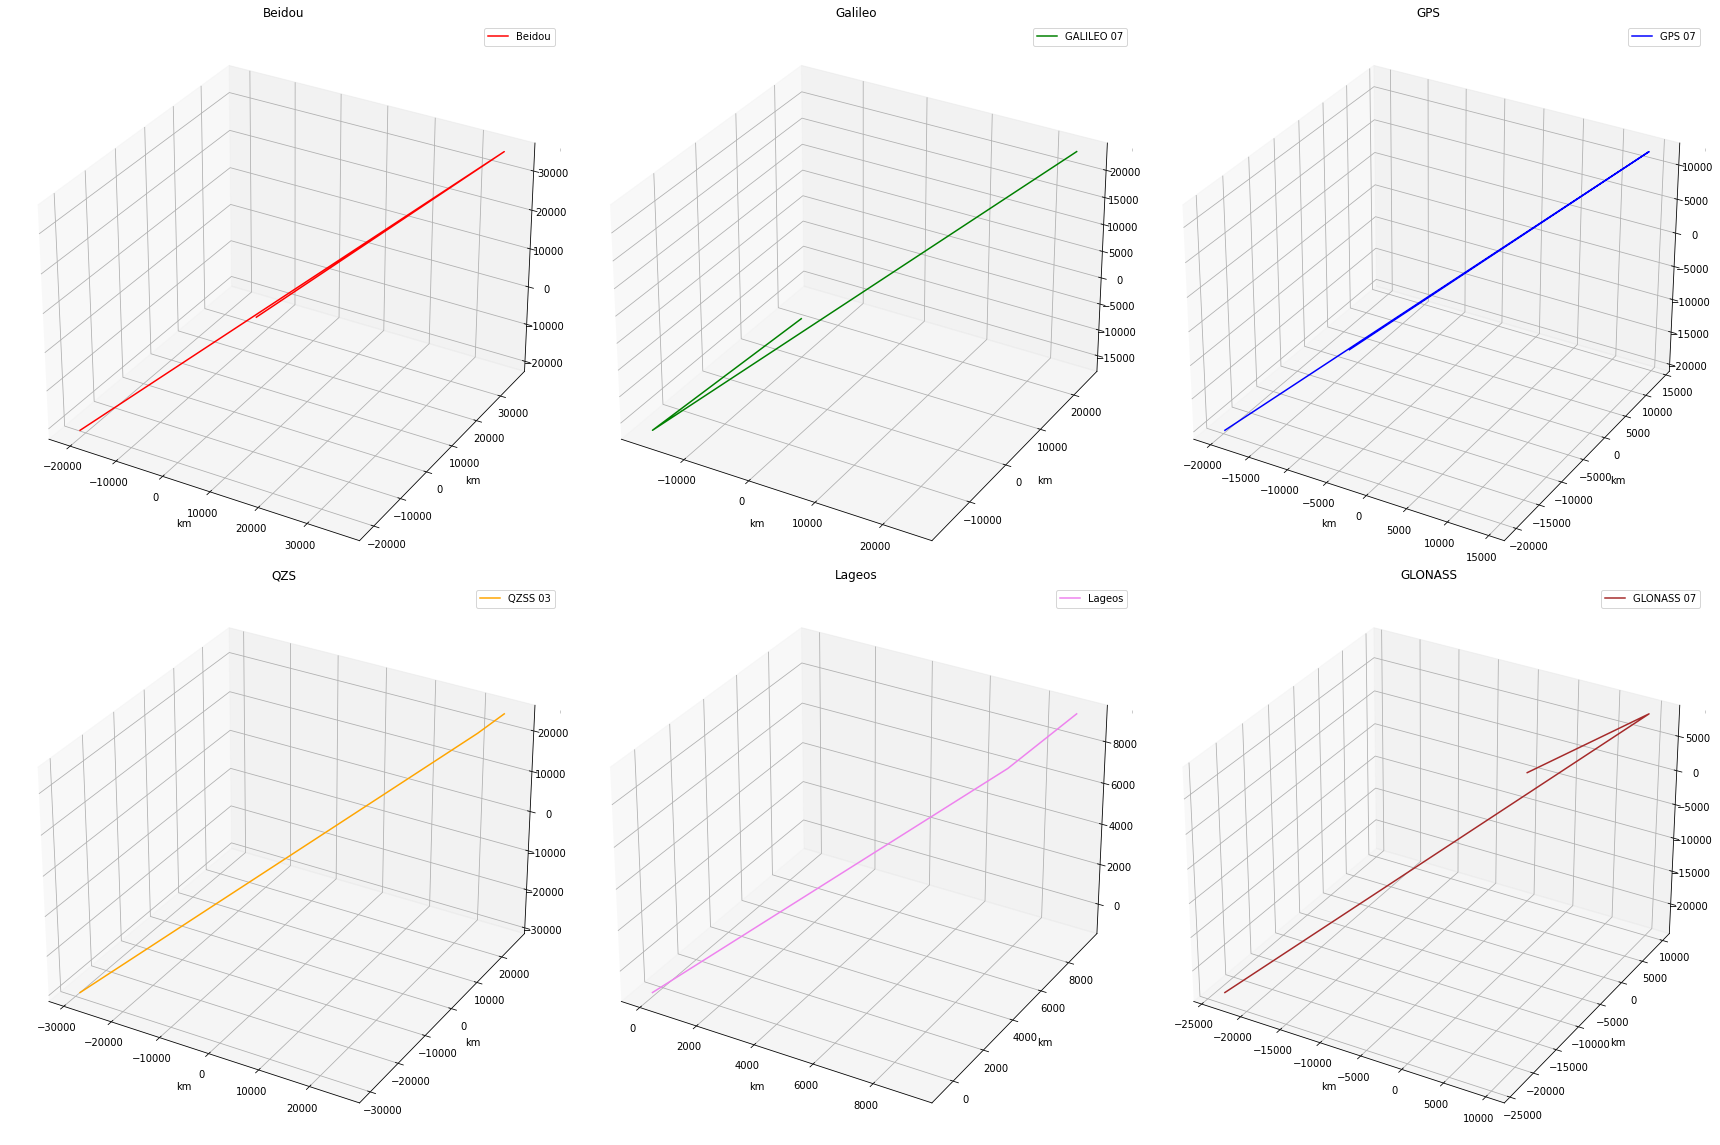

In [430]:
# Plot Satelite Positions in inertial system (ex. 1)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (24,16), subplot_kw=dict(projection = '3d'))

sub1 = fig.add_subplot(231, projection='3d')    
plt.plot(sat1[:][0],sat1[:][1],sat1[:][2], color = 'red', label = 'Beidou')
plt.title('Beidou')
plt.xlabel('km')
plt.ylabel('km')
plt.legend()
plt.tight_layout()

sub2 = fig.add_subplot(232,projection='3d')
plt.plot(sat2[:][0],sat2[:][1],sat2[:][2], color = 'green', label = 'GALILEO 07')
plt.title('Galileo')
plt.xlabel('km')
plt.ylabel('km')
plt.legend()
plt.tight_layout

sub3 = fig.add_subplot(233,projection='3d')
plt.plot(sat3[:][0],sat3[:][1],sat3[:][2], color = 'blue', label = 'GPS 07')
plt.title('GPS')
plt.xlabel('km')
plt.ylabel('km')
plt.legend()
plt.tight_layout

sub4 = fig.add_subplot(234,projection='3d')
plt.plot(sat4[:][0],sat4[:][1],sat4[:][2], color = 'orange', label = 'QZSS 03')
plt.title('QZS')
plt.xlabel('km')
plt.ylabel('km')
plt.legend()
plt.tight_layout

sub5 = fig.add_subplot(235,projection='3d')
plt.plot(sat5[:][0],sat5[:][1],sat5[:][2], color = 'violet', label = 'Lageos')
plt.title('Lageos')
plt.xlabel('km')
plt.ylabel('km')
plt.legend()
plt.tight_layout

sub6 = fig.add_subplot(236,projection='3d')
plt.plot(sat6[:][0],sat6[:][1],sat6[:][2], color = 'brown', label = 'GLONASS 07')
plt.title('GLONASS')
plt.xlabel('km')
plt.ylabel('km')
plt.legend()
plt.tight_layout

## Transformation von raumfest zu erdfestem System (Aufgabe 2)

$$e'_e = W R N P \overline{e}_{io}$$

wobei 

$$ W = R_2(-x_p) R_1(-y_p) $$
$$ R = R_3(\Theta_0) $$
$$ N = R_1(\epsilon_A - \Delta \epsilon) R_3(-\Delta \psi) R_1(\epsilon_A)$$
$$ P = R_3(-z_A)R_2(\theta_A)R_3(-\zeta_A) $$

sowie die Rotationsmatrizen

$$R_1(\phi) = \begin{pmatrix} 1 & 0 & 0 \\ 0 & \cos(\phi) & -\sin(\phi) \\ 0 & \sin(\phi) & \cos(\phi) \end{pmatrix}$$

$$R_2(\phi) = \begin{pmatrix} \cos(\phi) & 0 & \sin(\phi) \\ 0 & 1 &  0\\ -\sin(\phi) & 0 & \cos(\phi)  \end{pmatrix}$$

$$R_3(\phi) = \begin{pmatrix} \cos(\phi) & -\sin(\phi) & 0 \\ \sin(\phi) & \cos(\phi) &  0\\ 0 & 0 & 1  \end{pmatrix}$$

definiert sind.


Die Resultate der Kalkulationen finden sich unten:

In [431]:
# define W, R, N, P

#Precession P
zeta_A = 2306.2181 * t + 0.30188 * t**2 + 0.017998 * t**3 #sec of arc
theta_A = 2004.3109 * t - 0.42665 * t**2 -0.041833 * t**3 #sec of arc
z_A = 2306.2181 * t + 1.09468 * t**2 + 0.01823*t**3 #sec of arc

P = np.matmul(R3(-z_A),np.matmul(R2(theta_A),R3(-zeta_A)))

#Nutation N
epsilon_A = 84381.448-46.8150*t-0.00059*t**2+0.001813*t**3 #sec of arc
Delta_psi = -17.2 *sin(np.deg2rad(125-0.053*t*36525))-1.3*sin(np.deg2rad(200.9+1.971*t*36525)) #sec of arc
Delta_epsilon = 9.2 * sin(np.deg2rad(125-0.053*t*36525))+0.57*sin(np.deg2rad(200.9+1.971*t*36525)) #sec of arc

N = np.matmul(R1(-epsilon_A-Delta_epsilon),np.matmul(R3(-Delta_psi),R1(epsilon_A)))

#Earth Rotation R

#DUT1 announced in Sep 2019 -> DUT1 = UT1-UTC = -0.2s
DUT1 = -0.2
UTC = 1568937600 #20.09.2019 00:00 in seconds
GMST_0h = 24110.054841+8640184812866*t+0.093104*t**2-6.2*10**(-6)*t**3
GMST = GMST_0h + 1.0027379094*(DUT1+UTC)
Omega = np.deg2rad(125.0445-1934.1363*t) #Mondknoten
Theta_0 = GMST + Delta_psi*cos(epsilon_A) + 0.00264*sin(Omega)

R = R3(Theta_0)

#Pole movement W (x_p and yp given)

W = np.matmul(R2(-x_p),R1(-y_p))

#Transformation raumfest -> erdfest


T = np.matmul(W,np.matmul(R,np.matmul(N,P)))


In [432]:
sat1_gc = np.empty(sat1.shape)
sat2_gc = np.empty(sat2.shape)
sat3_gc = np.empty(sat3.shape)
sat4_gc = np.empty(sat4.shape)
sat5_gc = np.empty(sat5.shape)
sat6_gc = np.empty(sat6.shape)

for i in range(len(sat1)):
    sat1_gc[i] = np.matmul(T,sat1[i])
    sat2_gc[i] = np.matmul(T,sat2[i])
    sat3_gc[i] = np.matmul(T,sat3[i])
    sat4_gc[i] = np.matmul(T,sat4[i])
    sat5_gc[i] = np.matmul(T,sat5[i])
    sat6_gc[i] = np.matmul(T,sat6[i])

Die Plots können wie folgt hergeleitet werden:

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

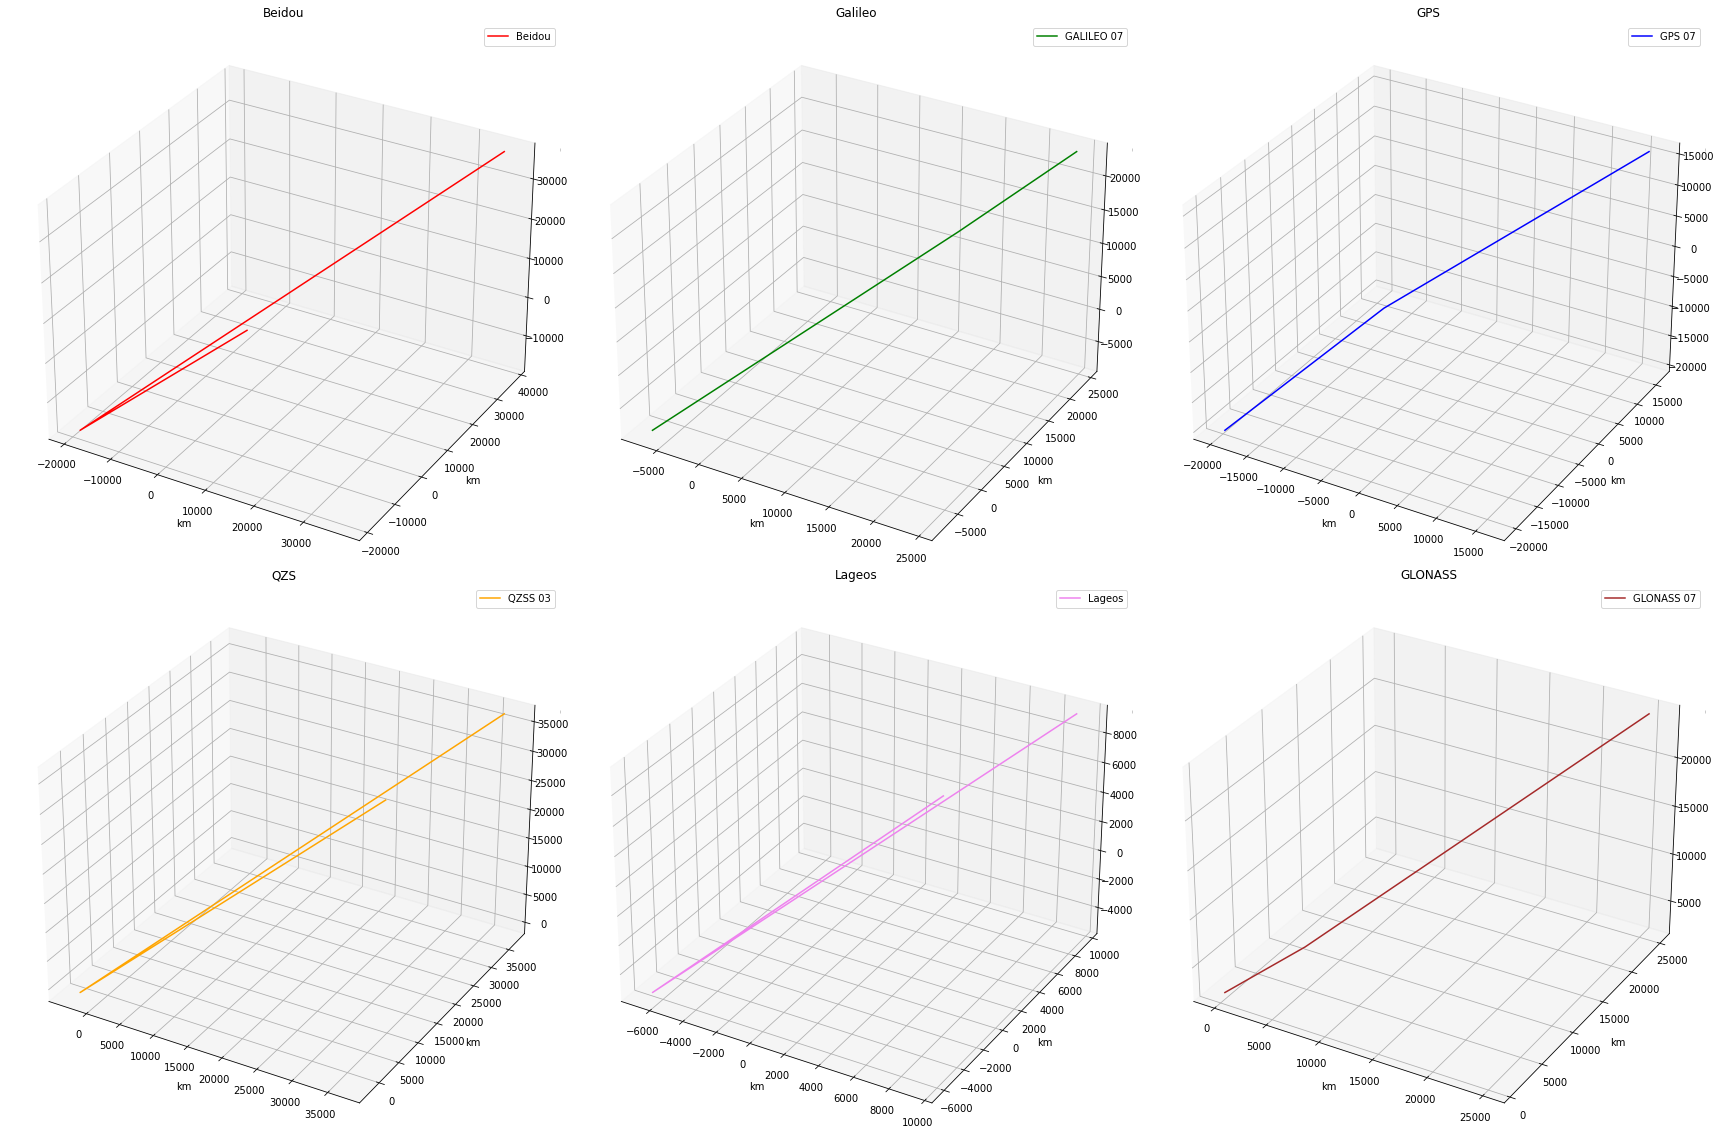

In [433]:
# Plot Satelite Positions in inertial system (ex. 2)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (24,16), subplot_kw=dict(projection = '3d'))

sub1 = fig.add_subplot(231, projection='3d')    
plt.plot(sat1_gc[:][0],sat1_gc[:][1],sat1_gc[:][2], color = 'red', label = 'Beidou')
plt.title('Beidou')
plt.xlabel('km')
plt.ylabel('km')
plt.legend()
plt.tight_layout()

sub2 = fig.add_subplot(232,projection='3d')
plt.plot(sat2_gc[:][0],sat2_gc[:][1],sat2_gc[:][2], color = 'green', label = 'GALILEO 07')
plt.title('Galileo')
plt.xlabel('km')
plt.ylabel('km')
plt.legend()
plt.tight_layout

sub3 = fig.add_subplot(233,projection='3d')
plt.plot(sat3_gc[:][0],sat3_gc[:][1],sat3_gc[:][2], color = 'blue', label = 'GPS 07')
plt.title('GPS')
plt.xlabel('km')
plt.ylabel('km')
plt.legend()
plt.tight_layout

sub4 = fig.add_subplot(234,projection='3d')
plt.plot(sat4_gc[:][0],sat4_gc[:][1],sat4_gc[:][2], color = 'orange', label = 'QZSS 03')
plt.title('QZS')
plt.xlabel('km')
plt.ylabel('km')
plt.legend()
plt.tight_layout

sub5 = fig.add_subplot(235,projection='3d')
plt.plot(sat5_gc[:][0],sat5_gc[:][1],sat5_gc[:][2], color = 'violet', label = 'Lageos')
plt.title('Lageos')
plt.xlabel('km')
plt.ylabel('km')
plt.legend()
plt.tight_layout

sub6 = fig.add_subplot(236,projection='3d')
plt.plot(sat6_gc[:][0],sat6_gc[:][1],sat6_gc[:][2], color = 'brown', label = 'GLONASS 07')
plt.title('GLONASS')
plt.xlabel('km')
plt.ylabel('km')
plt.legend()
plt.tight_layout

## Bodenspur bestimmen (Aufgabe 3)

Die Bodenspur wird bestimmt durch die Umwandlung der erdfesten Koordinaten in sphärische Koordinaten. Die Gleichungen lauten hierzu:

$$ \rho = \sqrt{(x^2+y^2+z^2)} $$
$$ \Theta = \arctan(\frac{x^2+y^2}{z}) = \arccos(\frac{z}{x^2+y^2+z^2})$$
$$ \varphi = \arctan(\frac{y}{x})$$

Hierbei muss beachtet werden, dass der korrekte Arcus Tangens verwendet wird (atan2), welcher der Python library genutzt werden kann. Es gilt dann als Befehl:

`atan2(y,x) #arc tangent of y/x`

Uns interessieren für diese Aufgabe hauptsächlich die Winkel. Diese werden dann benötigt, um die entsprechenden Höhen- sowie Breitengrade zu bestimmen. Die Winkel des sphärischen Koordinatensystems sind so definiert, dass der Azimutwinkel $\varphi$ als positiv gilt auf der Osthablkugel, und negativ auf der Westhalbkugel. Der Winkel $\Theta$ wird vom Nordpol aus gemessen. Dies bedeutet, dass Winkel bis zu 90° N jeweils dementsprechend von 90° abgezogen werden müssen. Winkel über 90° müssen von 90° abgezogen werden, sodass eine Skala von +90° und -90° erreicht wird.

In [434]:
#define functions for transformation from cartesian to spherical coordinates

def rho(a,b,c):
    r = np.sqrt(a**2+b**2+c**2)
    return r

def Theta(a,b,c):
    Th = math.atan2(math.sqrt(a**2+b**2),c)
    Th = np.rad2deg(Th) #convert rad into deg
    if Th <= 90:
        Th = 90-Th

    elif Th > 90:
        Th = 90-Th

    return Th

def varphi(a,b,c):
    p = math.atan2(b,a)
    p = np.rad2deg(p) #convert rad into deg
    return p 

In [435]:
sat1_sph = np.empty(sat1_gc.shape)
sat2_sph = np.empty(sat2_gc.shape)
sat3_sph = np.empty(sat3_gc.shape)
sat4_sph = np.empty(sat4_gc.shape)
sat5_sph = np.empty(sat5_gc.shape)
sat6_sph = np.empty(sat6_gc.shape)

for i in range(len(sat1)):
    sat1_sph[i][0] = rho(sat1_gc[i][0], sat1_gc[i][1], sat1_gc[i][2])
    sat1_sph[i][1] = Theta(sat1_gc[i][0], sat1_gc[i][1], sat1_gc[i][2])
    sat1_sph[i][2] = varphi(sat1_gc[i][0], sat1_gc[i][1], sat1_gc[i][2])
    sat2_sph[i][0] = rho(sat2_gc[i][0], sat2_gc[i][1], sat2_gc[i][2])
    sat2_sph[i][1] = Theta(sat2_gc[i][0], sat2_gc[i][1], sat2_gc[i][2])
    sat2_sph[i][2] = varphi(sat2_gc[i][0], sat2_gc[i][1], sat2_gc[i][2])
    sat3_sph[i][0] = rho(sat3_gc[i][0], sat3_gc[i][1], sat3_gc[i][2])
    sat3_sph[i][1] = Theta(sat3_gc[i][0], sat3_gc[i][1], sat3_gc[i][2])
    sat3_sph[i][2] = varphi(sat3_gc[i][0], sat3_gc[i][1], sat3_gc[i][2])
    sat4_sph[i][0] = rho(sat4_gc[i][0], sat4_gc[i][1], sat4_gc[i][2])
    sat4_sph[i][1] = Theta(sat4_gc[i][0], sat4_gc[i][1], sat4_gc[i][2])
    sat4_sph[i][2] = varphi(sat4_gc[i][0], sat4_gc[i][1], sat4_gc[i][2])
    sat5_sph[i][0] = rho(sat5_gc[i][0], sat5_gc[i][1], sat5_gc[i][2])
    sat5_sph[i][1] = Theta(sat5_gc[i][0], sat5_gc[i][1], sat5_gc[i][2])
    sat5_sph[i][2] = varphi(sat5_gc[i][0], sat5_gc[i][1], sat5_gc[i][2])
    sat6_sph[i][0] = rho(sat6_gc[i][0], sat6_gc[i][1], sat6_gc[i][2])
    sat6_sph[i][1] = Theta(sat6_gc[i][0], sat6_gc[i][1], sat6_gc[i][2])
    sat6_sph[i][2] = varphi(sat6_gc[i][0], sat6_gc[i][1], sat6_gc[i][2])

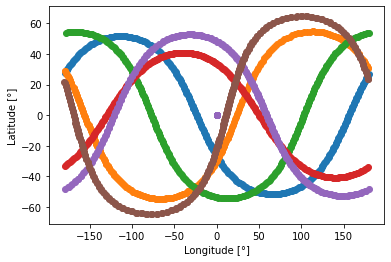

In [441]:
x_1=np.empty(len(sat1_sph))
y_1=np.empty(len(sat1_sph))
x_2=np.empty(len(sat2_sph))
y_2=np.empty(len(sat2_sph))
x_3=np.empty(len(sat3_sph))
y_3=np.empty(len(sat3_sph))
x_4=np.empty(len(sat4_sph))
y_4=np.empty(len(sat4_sph))
x_5=np.empty(len(sat5_sph))
y_5=np.empty(len(sat5_sph))
x_6=np.empty(len(sat6_sph))
y_6=np.empty(len(sat6_sph))

for i in range(len(sat1_sph)):
    x_1[i] = sat1_sph[i][1]
    y_1[i] = sat1_sph[i][2]
    x_2[i] = sat2_sph[i][1]
    y_2[i] = sat2_sph[i][2]
    x_3[i] = sat3_sph[i][1]
    y_3[i] = sat3_sph[i][2]
    x_4[i] = sat4_sph[i][1]
    y_4[i] = sat4_sph[i][2]
    x_5[i] = sat5_sph[i][1]
    y_5[i] = sat5_sph[i][2]
    x_6[i] = sat6_sph[i][1]
    y_6[i] = sat6_sph[i][2]

plt.scatter(y_1,x_1)
plt.scatter(y_2,x_2)
plt.scatter(y_3,x_3)
plt.scatter(y_4,x_4)
plt.scatter(y_5,x_5)
plt.scatter(y_6,x_6)
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.show()


In [447]:
#Minima and Maxima

max_x_1 = max(x_1)
max_x_2 = max(x_2)
max_x_3 = max(x_3)
max_x_4 = max(x_4)
max_x_5 = max(x_5)
max_x_6 = max(x_6)
min_x_1 = min(x_1)
min_x_2 = min(x_2)
min_x_3 = min(x_3)
min_x_4 = min(x_4)
min_x_5 = min(x_5)
min_x_6 = min(x_6)

print('Maximale Breite Beidou:',max_x_1,'°')
print('Maximale Breite Galileo:', max_x_2,'°')
print('Maximale Breite GPS:', max_x_3,'°')
print('Maximale Breite QZS:', max_x_4,'°')
print('Maximale Breite Lageos:', max_x_5,'°')
print('Maximale Breite GLONASS:', max_x_6,'°')

print('Minimale Breite Beidou:',min_x_1,'°')
print('Minimale Breite Galileo:', min_x_2,'°')
print('Minimale Breite GPS:', min_x_3,'°')
print('Minimale Breite QZS:', min_x_4,'°')
print('Minimale Breite Lageos:', min_x_5,'°')
print('Minimale Breite GLONASS:', min_x_6,'°')

Maximale Breite Beidou: 51.65482252585269 °
Maximale Breite Galileo: 54.68890037991947 °
Maximale Breite GPS: 54.41243899730026 °
Maximale Breite QZS: 40.86952289696156 °
Maximale Breite Lageos: 52.78497956715008 °
Maximale Breite GLONASS: 64.64262436306095 °
Minimale Breite Beidou: -51.65630484697451 °
Minimale Breite Galileo: -54.679998512162825 °
Minimale Breite GPS: -54.41360339737696 °
Minimale Breite QZS: -40.866931452878276 °
Minimale Breite Lageos: -52.784706605408985 °
Minimale Breite GLONASS: -64.62978741552149 °


## Analyse Aufgabe 3

Die Minima und Maxima der jeweiligen Konstellation sind sehr gleich auf der Nord- wie auch Südhalbkugel verteilt.

Die Unterschiede in den Werten jeder Konstellation kann hauptsächlich auf ihre Anwendungen, und implizit auch deren Distanz zur Erde rückgeführt werden. 

## Topzentrisches Koordinatensystem (Aufgabe 4)



### Distanz Wettzell zu Lageos

Aus den Daten wird Lageos gewählt als den Sateliten, dessen Distanz zu Wettzell berechnet werden sollte

Die Richtung der Koordinatenachsen des lokalen Systems wird wie folgt bestimmt:

$$ e_x = \begin{pmatrix} -\sin \Phi \cos \Lambda \\ -\sin \Phi \cos \Lambda \\ \cos \Phi \end{pmatrix}$$
$$ e_y = \begin{pmatrix} - \cos \Lambda \\ 0\end{pmatrix}$$
$$ e_z = \begin{pmatrix} \cos \Phi \cos \Lambda \\ \cos \Phi \sin \Lambda \\ \sin \Phi\end{pmatrix} $$

Mit der Transformationsmatrix $M$:

$$ \Delta x = \begin{pmatrix} -sin\Phi cos \Lambda & -sin\phi sin\Lambda & cos \Phi \\ -sin \Lambda & cos \Lambda & 0 \\ cos \Phi cos \Lambda & cos \Phi \Lambda & sin \Phi\end{pmatrix} X $$

Hierzu müssen die Astronomische Breite und Länge bekannt sein. Diese sind angenommen als angegeben als je $\lambda = \Lambda$ und $\varphi = \Phi$.

In [466]:
 #reiteration of parameters for wettzell
 
lambda_wettzell = 12.88333 #degree
 Theta_wettzell = 90-lambda_wettzell
 phi_wettzell = 49.15 #degree
 h = 670 #m
 
 t_GNSS = list(range(0,86700,300)) #s
 t_Lageos = list(range(0,86520,120)) #s

omega_E = 7.292115*10**(-5) #s

#Definiere Transformation
def M_lok(a,b): #a=phi, b=lambda
    a = np.deg2rad(a) 
    b = np.deg2rad(b)
    c_a, s_a = cos(a), sin(a)
    c_b, s_b = cos(b), sin(b)
    M = np.array(((-s_a*c_b, -s_a*s_b, c_a),(-s_b,c_b,0),(c_a*c_b,c_a*s_a,s_a)))
    return M

In [469]:
#Transformiere Lageos (sat5)

M_new = M_lok(phi_wettzell,lambda_wettzell)
sat5_trans = np.empty(sat5_gc.shape)

for i in range(len(sat5_gc)):
  sat5_trans[i] = np.matmul(M_new,sat5_gc[i])

Nun sind die Koordinaten in das lokale Bezugsystem transformiert worden. Jedoch müssen die Zenitwinkel sowie Azimut daraus berechnet werden. Diese sind analog bestimmt wie bei sphärischen Koordinaten bestimmbar (analog wie vorher)

In [ ]:
 #Calculate zenith and azimuth
 
 def s(a,b,c):
    r = np.sqrt(a**2+b**2+c**2)
    return r

def zenit(a,b,c):
    Th = math.atan2(math.sqrt(a**2+b**2),c)
    Th = np.rad2deg(Th) #convert rad into deg
    return Th

def azimut(a,b,c):
    p = math.atan2(b,a)
    p = np.rad2deg(p) #convert rad into deg
    return p 

In [470]:
sat5_trans_new = np.empty(sat5_trans.shape)

for i in range(len(sat1)):
    sat5_trans_new[i][0] = rho(sat5_trans[i][0], sat5_trans[i][1], sat5_trans[i][2])
    sat5_trans_new[i][1] = Theta(sat5_trans[i][0], sat5_trans[i][1], sat5_trans[i][2])
    sat5_trans_new[i][2] = varphi(sat5_trans[i][0], sat5_trans[i][1], sat5_trans[i][2])

Somit wird der Polarplot mit Azimut als argument, und Zenit als abhängige Variabel folgender Graph ermittelt

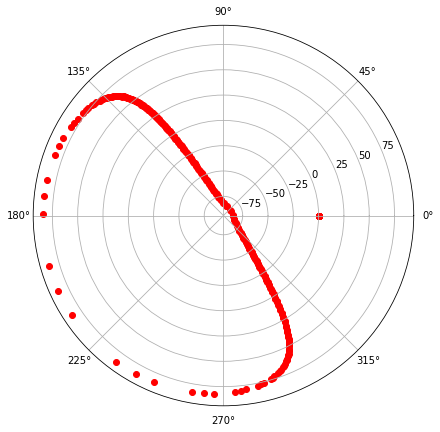

In [475]:
fig, ax = plt.subplots(1,1, figsize=(7,7), subplot_kw = dict(projection='polar'))

z_5_trans = np.empty(len(sat5_trans))
A_5_trans = np.empty(len(sat5_trans))
elev_5_trans = np.empty(len(sat5_trans))


for i in range(len(sat5_trans)):
    z_5_trans[i] = sat5_trans_new[i][1] #deg
    A_5_trans[i] = np.deg2rad(sat5_trans_new[i][2]) #rad
    elev_5_trans[i] = sat5_trans_new[i][0]
    
plt.scatter(A_5_trans,z_5_trans, color='red', label=name)

Der Plot für die Elevation über die Zeit hinweg sieht wie folgt aus:

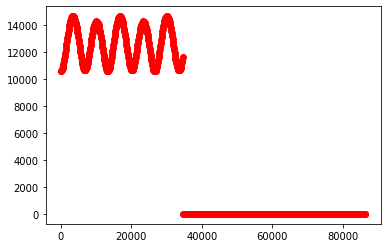

In [476]:
plt.scatter(t_Lageos,elev_5_trans, color='red', label=name)

In [481]:
elev_5_min = min(elev_5_trans)
min_index = np.where(elev_5_trans == np.amin(elev_5_trans))

print(min_index)
print(t_Lageos[311])        

(array([311, 391, 460, 500, 507, 577, 649]),)
37320


Ab Sekunde 37320 wird klar, dass die Elevation nicht gemessen werden kann. Dies geschieht bis zum Ende der 86400s.